# Import Library and Data
Mengimport library yang di butuhkan

In [0]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [0]:
df_raw= pd.read_excel('https://transfer.sh/bgaVh/Dataset%20Kasus%202.xlsx',
sheet_name='Data Siswa',
skiprows=range(5),
usecols=range(1, 12),
skipfooter=6)
# Import Data dengan bebera parameter yang disesuikan

## View Data
Menampilkan data yang telah di import

In [0]:
df = df_raw
df

,ID,Kelas,Jenis Kelamin,Umur,Agama,Rata-rata nilai akademik,Berat Badan,Tinggi Badan,Daerah Asal,Ekstrakurikuler,Nilai Ekstrakurikuler
0,S001,4,P,8.0,Islam,75.0,25.0,130.0,Jakarta,Voli,A
1,S002,4,L,7.0,Katolik,80.0,NaN,128.5,Jakarta,Voli dan Sepak bola,B dan C
2,S003,4,L,8.0,Kristen,81.0,27.0,120.7,Jakarta,Sepak bola,A
3,S004,4,L,8.0,Kristen,60.0,27.5,127.0,-,Voli dan Sepak bola,A dan B
4,S005,NaN,P,8.0,Kristen,90.0,26.0,126.0,Bandung,Voli,A
5,S006,4,L,6.0,Islam,63.0,21.0,117.5,Jakarta,Sepak bola,A
6,S007,4,P,7.0,Islam,45.0,25.0,121.5,Jakarta,Voli,B
7,S008,4,P,8.0,Islam,NaN,26.0,126.0,Cirebon,-,-
8,S009,4,P,6.0,Islam,70.0,19.0,120.0,Tangerang,Voli,B
9,S010,4,P,6.0,Islam,76.0,20.0,123.0,Banten,Voli,B


## Check Data 

In [0]:
df.isna().any() # Menampilkan Kolom yang mengandung Nilai NaN

ID                          False
Kelas                        True
Jenis Kelamin               False
Umur                         True
Agama                       False
Rata-rata nilai akademik     True
Berat Badan                  True
Tinggi Badan                 True
Daerah Asal                 False
Ekstrakurikuler             False
Nilai Ekstrakurikuler       False
dtype: bool

In [0]:
# Delet data yang tidak di perlukan yang tidak dapat diproses oleh classifier model atau field yang tidak relevan dengan kasus
df.drop(['Kelas','Jenis Kelamin','Umur','Agama','Berat Badan','Tinggi Badan','Daerah Asal','Ekstrakurikuler'], axis=1, inplace=True) 

# Preprocessing

In [0]:
df

,ID,Rata-rata nilai akademik,Nilai Ekstrakurikuler
0,S001,75.0,A
1,S002,80.0,B dan C
2,S003,81.0,A
3,S004,60.0,A dan B
4,S005,90.0,A
5,S006,63.0,A
6,S007,45.0,B
7,S008,NaN,-
8,S009,70.0,B
9,S010,76.0,B


In [0]:
# Delete Rows yang mengandung NaN, untuk menghindari data 
df.dropna(how='any', inplace=True)
df.reset_index(drop=True)

,ID,Rata-rata nilai akademik,Nilai Ekstrakurikuler
0,S001,75.0,A
1,S002,80.0,B dan C
2,S003,81.0,A
3,S004,60.0,A dan B
4,S005,90.0,A
5,S006,63.0,A
6,S007,45.0,B
7,S009,70.0,B
8,S010,76.0,B
9,S011,74.0,B


In [0]:
# Memisahkan colom Nilai Ekstrakurikuler yang memiliki 2 nilai
df['Niali_Extra_A'], df['Niali_Extra_B'] = df['Nilai Ekstrakurikuler'].str.split(' dan ', 1).str

In [0]:
df

,ID,Rata-rata nilai akademik,Nilai Ekstrakurikuler,Niali_Extra_A,Niali_Extra_B
0,S001,75.0,A,A,NaN
1,S002,80.0,B dan C,B,C
2,S003,81.0,A,A,NaN
3,S004,60.0,A dan B,A,B
4,S005,90.0,A,A,NaN
5,S006,63.0,A,A,NaN
6,S007,45.0,B,B,NaN
8,S009,70.0,B,B,NaN
9,S010,76.0,B,B,NaN
10,S011,74.0,B,B,NaN


In [0]:
# Delete Colomn Nilai Ekstrakurikuler yang tidak lagi digunakan
df.drop(['Nilai Ekstrakurikuler'], axis=1, inplace=True) 
df

,ID,Rata-rata nilai akademik,Niali_Extra_A,Niali_Extra_B
0,S001,75.0,A,NaN
1,S002,80.0,B,C
2,S003,81.0,A,NaN
3,S004,60.0,A,B
4,S005,90.0,A,NaN
5,S006,63.0,A,NaN
6,S007,45.0,B,NaN
8,S009,70.0,B,NaN
9,S010,76.0,B,NaN
10,S011,74.0,B,NaN


In [0]:
# Mengconver nilai Huruf ke nilai angka
grades = {'A': 85,'B': 80, 'C':75, 'D':70}
df['Niali_Extra_A_Num'] = df.Niali_Extra_A.map(grades)
df['Niali_Extra_B_Num'] = df.Niali_Extra_B.map(grades)
df

,ID,Rata-rata nilai akademik,Niali_Extra_A,Niali_Extra_B,Niali_Extra_A_Num,Niali_Extra_B_Num
0,S001,75.0,A,NaN,85,NaN
1,S002,80.0,B,C,80,75.0
2,S003,81.0,A,NaN,85,NaN
3,S004,60.0,A,B,85,80.0
4,S005,90.0,A,NaN,85,NaN
5,S006,63.0,A,NaN,85,NaN
6,S007,45.0,B,NaN,80,NaN
8,S009,70.0,B,NaN,80,NaN
9,S010,76.0,B,NaN,80,NaN
10,S011,74.0,B,NaN,80,NaN


In [0]:
#Mendapatkan rata rata dari niali extra 
df['Mean_of_Extra'] = df[['Niali_Extra_A_Num', 'Niali_Extra_B_Num']].mean(axis=1)
df

,ID,Rata-rata nilai akademik,Niali_Extra_A,Niali_Extra_B,Niali_Extra_A_Num,Niali_Extra_B_Num,Mean_of_Extra
0,S001,75.0,A,NaN,85,NaN,85.0
1,S002,80.0,B,C,80,75.0,77.5
2,S003,81.0,A,NaN,85,NaN,85.0
3,S004,60.0,A,B,85,80.0,82.5
4,S005,90.0,A,NaN,85,NaN,85.0
5,S006,63.0,A,NaN,85,NaN,85.0
6,S007,45.0,B,NaN,80,NaN,80.0
8,S009,70.0,B,NaN,80,NaN,80.0
9,S010,76.0,B,NaN,80,NaN,80.0
10,S011,74.0,B,NaN,80,NaN,80.0


# Clustering

In [0]:
# Pilih Colom fitur yang akan digunakan untuk cluster
df_feature = df[['Rata-rata nilai akademik', 'Mean_of_Extra']]
df_feature

,Rata-rata nilai akademik,Mean_of_Extra
0,75.0,85.0
1,80.0,77.5
2,81.0,85.0
3,60.0,82.5
4,90.0,85.0
5,63.0,85.0
6,45.0,80.0
8,70.0,80.0
9,76.0,80.0
10,74.0,80.0


In [0]:
#Lakukan Prose cluster
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(df_feature)
labels = k_means.labels_
print(labels)

[1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1]


In [0]:
# Masukkan label hasil clutering ke dataframe
df["Clus_km"] = labels
df

,ID,Rata-rata nilai akademik,Niali_Extra_A,Niali_Extra_B,Niali_Extra_A_Num,Niali_Extra_B_Num,Mean_of_Extra,Clus_km
0,S001,75.0,A,NaN,85,NaN,85.0,1
1,S002,80.0,B,C,80,75.0,77.5,1
2,S003,81.0,A,NaN,85,NaN,85.0,1
3,S004,60.0,A,B,85,80.0,82.5,0
4,S005,90.0,A,NaN,85,NaN,85.0,1
5,S006,63.0,A,NaN,85,NaN,85.0,0
6,S007,45.0,B,NaN,80,NaN,80.0,0
8,S009,70.0,B,NaN,80,NaN,80.0,0
9,S010,76.0,B,NaN,80,NaN,80.0,1
10,S011,74.0,B,NaN,80,NaN,80.0,0


# Classification

In [0]:
# Import library untuk classificasi
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [0]:
X = df[['Rata-rata nilai akademik', 'Mean_of_Extra']]
y = df[['Clus_km']]

In [0]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% tes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 2), (9, 2), (20, 1), (9, 1))

In [0]:
#Lakukan Training
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Validasi

In [0]:
pred_nb = clf_nb.predict(X_test)
print("Accuracy\t\t: ",accuracy_score(y_test, pred_nb))
print("Precision\t\t: ",precision_score(y_test, pred_nb))
print("Recall\t\t\t: ",recall_score(y_test, pred_nb))
print("F1-score\t\t: ",f1_score(y_test, pred_nb))
print("Confusion Matrix\t:\n",confusion_matrix(y_test, pred_nb))

Accuracy		:  0.8888888888888888
Precision		:  0.8571428571428571
Recall			:  1.0
F1-score		:  0.923076923076923
Confusion Matrix	:
 [[2 1]
 [0 6]]


In [0]:
! pip install scikit-plot

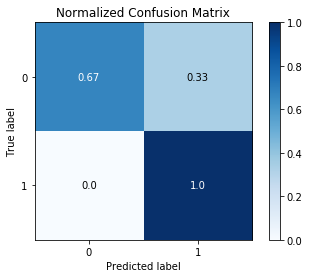

In [0]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred_nb, normalize=True)
plt.show()